In [ ]:
import scipy.misc
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive
from sklearn.decomposition import PCA
from PIL import Image
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
drive.mount('/content/gdrive/', force_remount=True)


Mounted at /content/gdrive/


In [ ]:


def main():
    train_data , train_label = loadImages('train')
    test_data , test_label = loadImages('test')

    print("number of train data images is" , train_data.shape[0] , "and number of features for each image is", train_data.shape[1])

    ### To show each images, you should reshape it to 256,256 and then use 'plt.imshow'
    plt.imshow(train_data[0].reshape(256,256) , cmap='gray')
    plt.show()

    ### Write your code here


    ###



def loadImages(dirName):
    # This function loads images from any directory
    # :param str dirName: is address of the directory (string)

    data = []
    label = []
    for root, dirs, files in os.walk(dirName):
        for file in files:
            face = Image.open(os.path.join(root, file)) # Load image from a path
            face = list(face.getdata())
            data.append(face)
            label.append(file.split('.')[1])                   # Label of an image is in its fileName
    return np.asarray(data) , label



#if __name__ == '__main__':
  #main()

In [ ]:
directory=("/content/gdrive/MyDrive/emotion detection dateset/train")
pic=[i for i in os.listdir(directory)]
pic2=[]
f,l=loadImages(directory)

<BarContainer object of 154 artists>

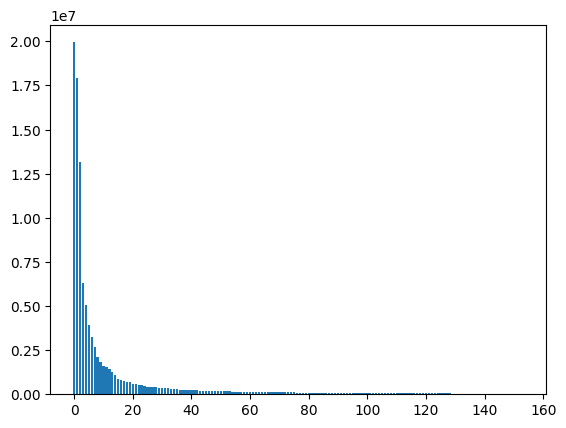

In [ ]:
pca=PCA()
pca.fit(f)
svalue=pca.explained_variance_
sorted_indices=np.argsort(svalue)[::-1]
plt.bar(range(len(svalue)),svalue[sorted_indices])


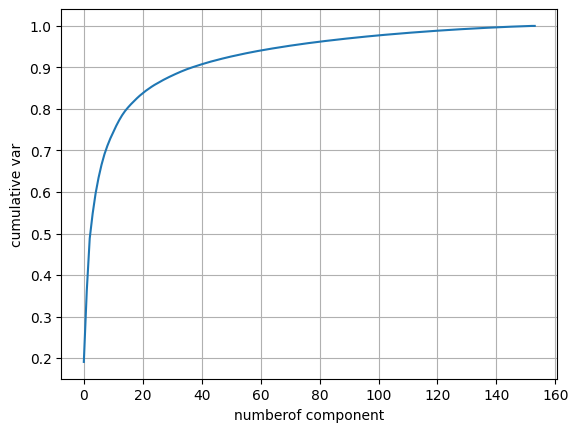

In [ ]:
evr=pca.explained_variance_ratio_
cvr=np.cumsum(evr)
plt.plot(range(len(cvr)),cvr)
plt.xlabel('numberof component')
plt.ylabel('cumulative var')
plt.grid()


اگر تعداد ویژگی ها را کم انتخاب کنیم کم برازش و اگر تعداد ان را زیاد در نظر بگیریم بیش برازش اتفاق می افتد در اینجا اگر ۴۰ ویژگی را انتخاب کنیم بیش از ۹۰ درصد اطلاعات حفظ می شود ولی بعد از ان شیب نمودار کم می شود و به ازای تعداد
زیادی ویژگی مقدار کمی به مقدار اطلاعات حفظ اضافه می شود


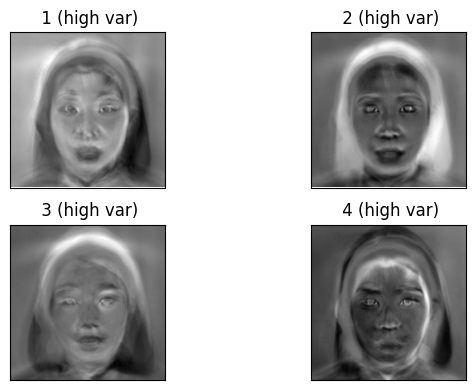

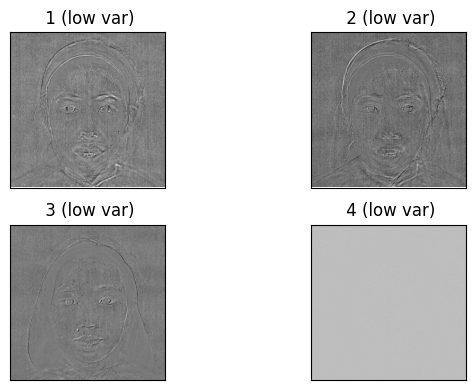

In [ ]:
component=4
scomponent=pca.components_[sorted_indices[:4]]
fig, axes=plt.subplots(2,2,figsize=(10,4))
for i , ax in enumerate(axes.flat):
  ef=scomponent[i]
  ax.imshow(ef.reshape((256,256)),cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f' {i+1} (high var)')
  plt.tight_layout()
component=4
scomponent=pca.components_[sorted_indices[-4:]]
fig, axes=plt.subplots(2,2,figsize=(10,4))
for i , ax in enumerate(axes.flat):
  ef=scomponent[i]
  ax.imshow(ef.reshape((256,256)),cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f' {i+1} (low var)')
  plt.tight_layout()


در جاهایی که واریانس کم است چهره قابل تشخیص نیست چون تعداد زیادی از داده ها از دست رفته ولی در جاهایی که واریانس زیاد است با این که کمی از اطلاعات از دست رفته و چهره کاملا مشخص است چون ویژگی های اصلی حفظ شده است

In [ ]:
y_test=pd.read_csv("/content/gdrive/MyDrive/testLabels.csv")
x_test=pd.read_csv("/content/gdrive/MyDrive/testData.csv")
y_train=pd.read_csv("/content/gdrive/MyDrive/trainLabels.csv")
x_train=pd.read_csv("/content/gdrive/MyDrive/trainData.csv")

In [ ]:
#normalizition
x_test=x_test/255
x_train=x_train/255

In [ ]:
#cal between var and within var
n_class=len(np.unique(y_train))
n_f=x_train.shape[1]
sw=np.zeros((n_f,n_f))
sb=np.zeros((n_f,n_f))
for l in np.unique(y_train):
  xgr=x_train[y_train['9']==l]
  class_mean=np.mean(xgr,axis=0)
  c=xgr-class_mean
  sw+=np.dot(c.T,c)
  sb+=len(xgr)*np.outer(class_mean,class_mean)


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'eigenvalues')

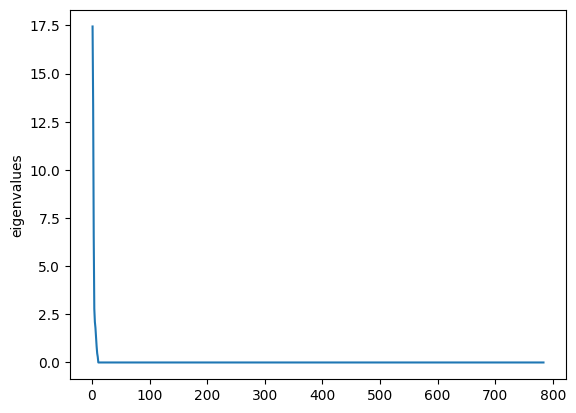

In [ ]:
#cal egien values
value,vector=np.linalg.eig(np.linalg.inv(sw) @ sb)
sorted=value[np.argsort(value)[::-1]]
plt.plot(range(1,len(sorted)+1),sorted)
plt.ylabel('eigenvalues')

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'seperability measure')

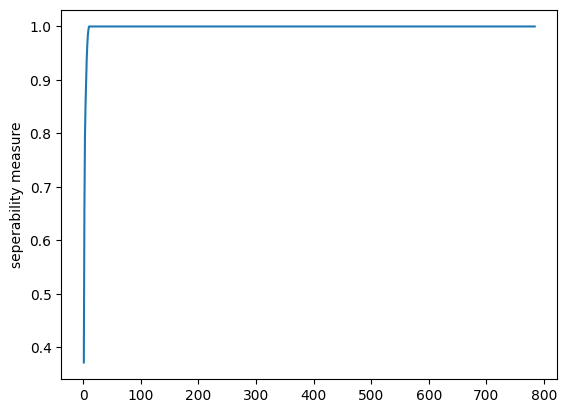

In [ ]:
#seperability measure
sm=np.cumsum(sorted)/np.sum(sorted)
plt.plot(range(1,len(sm)+1),sm)
plt.ylabel('seperability measure')

هر چقدر تعداد بیشتری ویژگی انتخاب کنیم جداژذیری بیشتر می شئد تا یک جایی که بعد ان ثابت می ماند